In [944]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [945]:
conso_data = pd.read_csv('Pandas_dataframe__3_.csv')
pd.set_option('display.max_columns', 60)

In [946]:
# Ajouter une colonne qui ne prend que les holidays hors dimanche
# day-off national public holidays 
french_holidays = ["NewYearsDay","EasterMonday","LaborDay","FRFetDeLaVictoire1945","FRAscension","PentecostMonday","FRBastilleDay","FRAssumptionVirginMary","FRAllSaints","FRArmisticeDay","ChristmasDay"]
conso_data['is_public_holiday'] = conso_data['public_holidays'].isin(french_holidays).astype(int)
conso_data[(conso_data["date"] >= '2019-01-01')]

,date,li,li_terega,pitd,pitd_terega,pitd1,pitd2,pitd7,target1,target2,target7,temp_mean,tmoy,tmoy1,tmoy2,teff_optim,teff_constr,teff_cwv,below16.5,below16.5_abc,tmoy_diff_1,teff_optim_diff_1,teff_constr_diff_1,teff_cwv_diff_1,target,etats,type_vol,month,nmonth,year,...,isWeekend,isBizday,isHoliday,weekend,not_weekend,cosinus,sinus,weekdays,quarter,season,doy,mday,woy,wday,season_astrono,season_metero,noel.structural,aout.structural,public_holidays,extended_holidays,dow,ponts_publics,ponts_publics_abc,ponts_extended,ponts_extended_abc,holidays,lat,lon,daydur,is_public_holiday
1033,2019-01-01 00:00:00+00:00,94519.878,1114.266,516586.695,66489.277,526690.407,553708.612000,577309.402000,-27018.205000,-72297.247000,125589.652000,6.393534,6.393534,6.497414,5.662069,6.205922,6.351552,6.137421,1.0,cold,-0.103879,0.324615,0.325129,0.334834,-10103.712,1.0,vol_one,January,1.0,2019,...,False,True,False,0.0,1.0,0.999852,0.017213,Tuesday,1,peak_season,1,1,1.0,2,Winter,Winter,1.0,0.0,NewYearsDay,NewYearsDay,Tuesday,0,SundayOrHoliday,0,SundayOrHoliday,1,48.861227,2.341542,8.326111,1
1034,2019-01-02 00:00:00+00:00,104085.163,1146.904,609081.735,68908.081,516586.695,526690.407000,683757.585000,-10103.712000,-27018.205000,106448.183000,4.537069,4.537069,6.393534,6.497414,5.134387,5.290043,5.371496,1.0,cold,-1.856466,-1.071535,-1.061509,-0.765925,92495.040,1.0,vol_one,January,1.0,2019,...,False,True,False,0.0,1.0,0.999407,0.034422,Wednesday,1,peak_season,2,2,1.0,3,Winter,Winter,1.0,0.0,NotAHoliday,NotAHoliday,Wednesday,0,Wednesday,0,Wednesday,0,48.861227,2.341542,8.343056,0
1035,2019-01-03 00:00:00+00:00,107469.973,1171.838,673440.951,78085.702,609081.735,516586.695000,710556.795000,92495.040000,-10103.712000,26799.210000,2.457759,2.457759,4.537069,6.393534,3.584037,3.475129,3.796073,1.0,cold,-2.079310,-1.550350,-1.814914,-1.575423,64359.216,1.0,vol_one,January,1.0,2019,...,False,True,False,0.0,1.0,0.998667,0.051620,Thursday,1,peak_season,3,3,1.0,4,Winter,Winter,0.0,0.0,NotAHoliday,NotAHoliday,Thursday,0,Thursday,0,Thursday,0,48.861227,2.341542,8.361389,0
1036,2019-01-04 00:00:00+00:00,106765.520,1162.384,685593.918,82974.129,673440.951,609081.735000,690681.651000,64359.216000,92495.040000,-19875.144000,2.293534,2.293534,2.457759,4.537069,2.890351,2.567155,2.938786,1.0,cold,-0.164224,-0.693686,-0.907974,-0.857287,12152.967,1.0,vol_one,January,1.0,2019,...,False,True,False,0.0,1.0,0.997630,0.068802,Friday,1,peak_season,4,4,1.0,5,Winter,Winter,0.0,0.0,NotAHoliday,NotAHoliday,Friday,0,Friday,0,Friday,0,48.861227,2.341542,8.381111,0
1037,2019-01-05 00:00:00+00:00,103166.900,1108.547,651383.592,79916.463,685593.918,673440.951000,626005.859000,12152.967000,64359.216000,-64675.792000,3.599569,3.599569,2.293534,2.457759,3.241710,3.093578,3.244960,1.0,cold,1.306034,0.351359,0.526422,0.306174,-34210.326,1.0,vol_one,January,1.0,2019,...,True,False,True,1.0,0.0,0.996298,0.085965,Saturday,1,peak_season,5,5,1.0,6,Winter,Winter,0.0,0.0,NotAHoliday,NotAHoliday,Saturday,0,Saturday,0,Saturday,0,48.861227,2.341542,8.402222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,2022-08-27 00:00:00+00:00,77750.518,1336.511,53607.836,5609.391,69413.776,72005.387175,51464.703000,-2591.611175,-219.985825,-11509.810000,21.643103,21.643103,21.842672,23.890517,22.242504,21.927716,22.176435,0.0,hot,-0.199569,-0.467262,-0.824784,-0.617697,-15805.940,0.0,vol_zero,August,8.0,2022,...,True,False,True,1.0,0.0,-0.563151,-0.826354,Saturday,3,off_season,239,27,34.0,6,Summer,Summer,0.0,0.0,NotAHoliday,NotAHoliday,Saturday,0,Saturday,0,Saturday,0,48.861227,2.341542,13.745556,0
2293,2022-08-28 00:00:00+00:00,76337.247,1241.000,52491.579,5223.217,53607.836,69413.776000,50467.004000,-15805.940000,-2591.611175,-997.699000,22.728448,22.728448,21.643103,21.842672,22.447639,22.314267,22.485476,

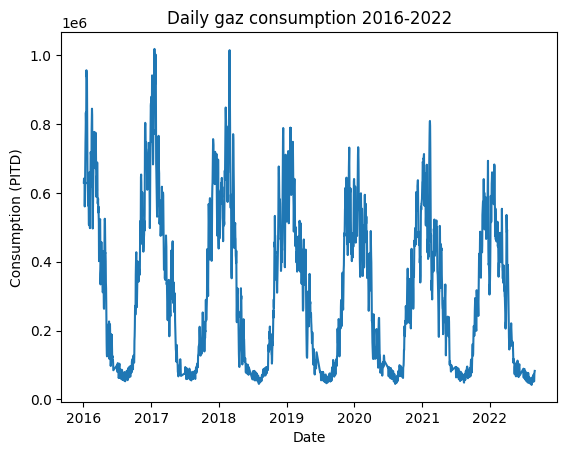

In [947]:
import matplotlib.dates as mdates

conso_data["date"] = pd.to_datetime(conso_data["date"])
plt.plot(conso_data["date"], conso_data["pitd"])
plt.title('Daily gaz consumption 2016-2022')
plt.xlabel('Date')
plt.ylabel('Consumption (PITD)')


ax = plt.gca()

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

Le graphique révèle un phénomène de saisonnalité sur la période 2019-2022 marqué par des pics de consommations durant l'hiver et réciproquement des creux durant l'été. En effet, la consommation de gaz des ménages est décomposé en trois postes principaux selon les chiffres de l'ADEME en 2019 : le chauffage (80%), l'eau chaude (10%) et la cuisson (10%). Durant l'hiver le chauffage domine la consommation de gaz. Durant l'été, le chauffage et la chauffe de l'eau sont réduits, de ce fait, la cuisson dirige la consommation de gaz.
On remarque une différence marquée entre les hivers de 2016-2018 et 2019-2022. Une cause plausible est que les hivers sont plus chauds depuis 2019. On peut mesurer cela grâce aux Heating Degree Days, mesurant, à partir d'un seuil de 16.5°C le chauffage nécessaire en termes de degrés pour atteindre le seuil. Ainsi, si l'on somme sur le mois, on peut mesurer si le mois était plus froid d'une année à l'autre.

C:\Users\juliu\AppData\Local\Temp\ipykernel_29952\1307731975.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_hdd = conso_data.set_index('date').resample('M')['hdd'].sum()


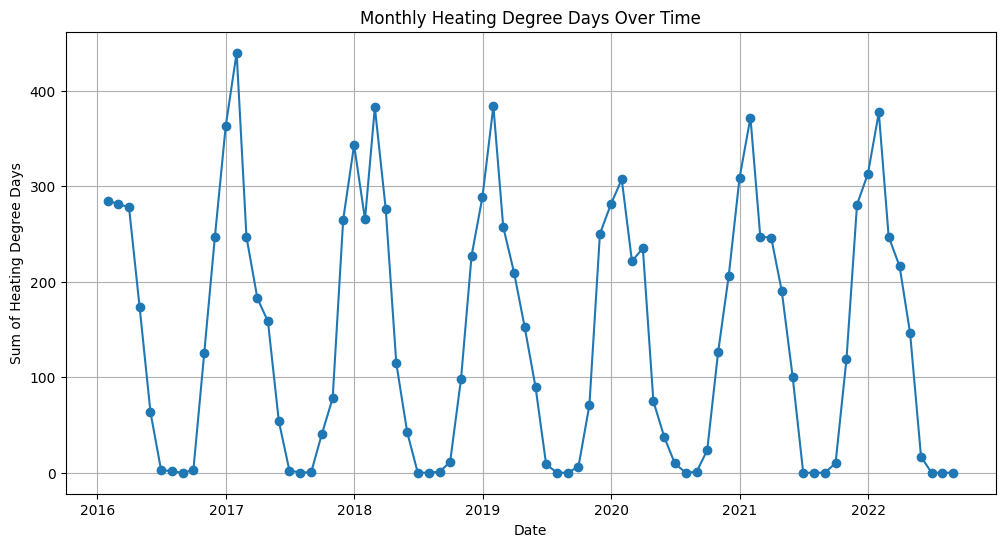

In [948]:
import pandas as pd
import matplotlib.pyplot as plt
conso_data['date'] = pd.to_datetime(conso_data['date'])
# Define the base temperature for HDD calculation
base_temp = 16.5

# Calculate daily HDD: only count when tmoy is below 16.5
conso_data['hdd'] = (base_temp - conso_data['tmoy']).clip(lower=0)

# Group by month: resample the DataFrame based on the 'dates' column (set as index)
monthly_hdd = conso_data.set_index('date').resample('M')['hdd'].sum()

# Plot the monthly sum of HDD
plt.figure(figsize=(12, 6))
plt.plot(monthly_hdd.index, monthly_hdd.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sum of Heating Degree Days')
plt.title('Monthly Heating Degree Days Over Time')
plt.grid(True)
plt.show()


On observe que le nombre de HDD ne varie pas sensiblement entre les blocs 2016-2018 et 2019-2022. Ainsi l'explication d'hivers plus chauds ne semble pas être la bonne. un autre axe d'explication est la baisse progressive de la demande de gaz lié au passage à l'électrique ou à une meilleure isolation. On peut donc supposer qu'il y a simplement moins de clients. On décide alors de ne pas prendre en compte la période 2016-2018 et de commencer à 2019.

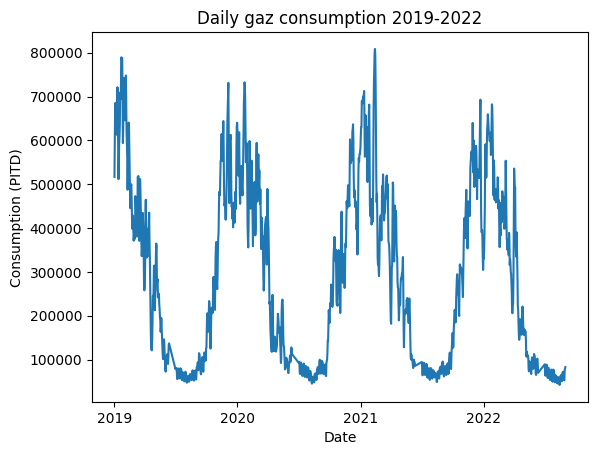

In [949]:

import matplotlib.dates as mdates

# 2019 and onwards
data_from_2019 = conso_data[conso_data["date"] >= '2019-01-01']

plt.plot(data_from_2019["date"], data_from_2019["pitd"])
plt.title('Daily gaz consumption 2019-2022')
plt.xlabel('Date')
plt.ylabel('Consumption (PITD)')


ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()


On observe, comme précedemment, la différence marquée entre la consommation de gaz en été et en hiver

In [950]:
conso_data2 = conso_data

<Figure size 1000x600 with 0 Axes>

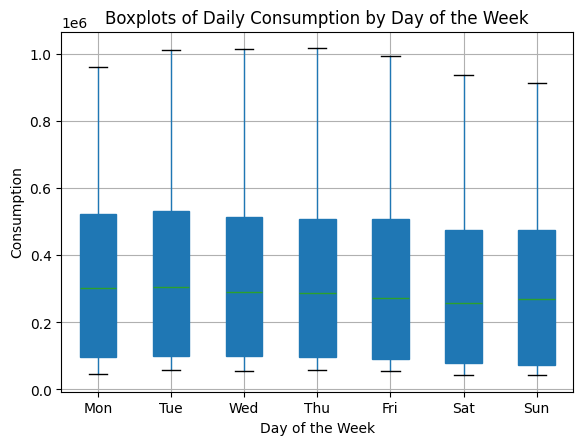

In [951]:
conso_data2['date'] = pd.to_datetime(conso_data2['date'])

# Extract day of the week (0 = Monday, 6 = Sunday)
conso_data2['day_of_week'] = conso_data2['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Define the correct order for days of the week (Monday to Sunday)
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Convert the 'day_of_week' to categorical with the correct order
conso_data2['day_of_week'] = pd.Categorical(conso_data2['day_of_week'], categories=range(0, 7), ordered=True)

# Group by 'day_of_week' and plot the boxplot
plt.figure(figsize=(10, 6))
conso_data2.boxplot(column='pitd', by='day_of_week', patch_artist=True)

# Add titles and labels
plt.title('Boxplots of Daily Consumption by Day of the Week')
plt.suptitle('')  # To remove the default title added by boxplot
plt.xlabel('Day of the Week')
plt.ylabel('Consumption')

# Set the x-ticks to correspond to the day names in the correct order
plt.xticks(ticks=range(1,8), labels=day_order)

# Show plot
plt.show()

#Similarités entre wed, thu, fri alors qu'on a un changement de conso le weeknd, les gens consomment moins ou différemment, catégories début semaine, milieu semaine et samedi dimanche, est ce que le calendrier est pertinent à garder ou est ce qu'il ne vaut pas mieux regrouper en groupes de jours. Regarder les boxplots sur les différents holidays, éventuellement grouper en holidays majeurs/mineurs. 
# Mettre l'accent sur les holidays car c'est la que le modèle se plante un peu, vraiment regarder les holidays par années. Plus de description sur tous les holidays en général à faire.

On observe une légère décroissance de la médiane de consommation de gaz au cours de la semaine. Cette décroissance fait ressortir deux catégories de jours de consommation. La semaine (lundi à jeudi) marquée par une consommation plus élevé que le weekend allongé (vendredi-dimanche). l'écart inter-quartile reste sensiblement le même tandis que les outliers durant le milieu de semaine sont plus élevés.

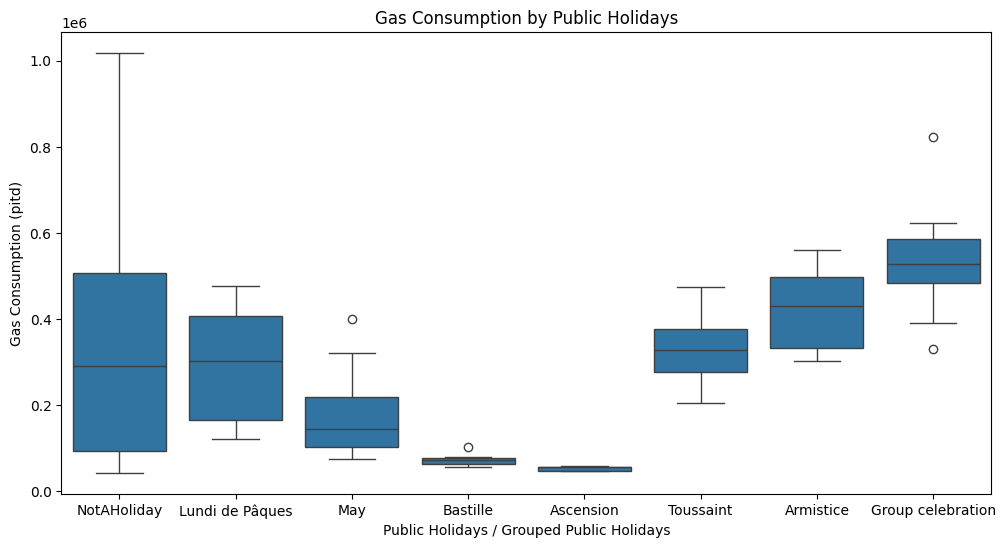

In [952]:

holiday_group_mapping = {
    "NewYearsDay": "Group celebration",
    "ChristmasDay": "Group celebration",
    "EasterMonday": "Lundi de Pâques",
    "PentecostMonday": "May",
    "FRAscension": "May",  
    "LaborDay": "May",
    "FRFetDeLaVictoire1945": "May",
    "FRBastilleDay": "Bastille",
    "FRArmisticeDay": "Armistice",
    "FRAssumptionVirginMary": "Ascension",
    "FRAllSaints": "Toussaint",
    "NotAHoliday": "NotAHoliday"}

conso_data['holiday_group'] = conso_data['public_holidays'].map(holiday_group_mapping)

plt.figure(figsize=(12, 6))
sns.boxplot(x='holiday_group', y='pitd', data=conso_data)
plt.title('Gas Consumption by Public Holidays')
plt.xlabel('Public Holidays / Grouped Public Holidays')
plt.ylabel('Gas Consumption (pitd)')
plt.show()


<Figure size 1000x600 with 0 Axes>

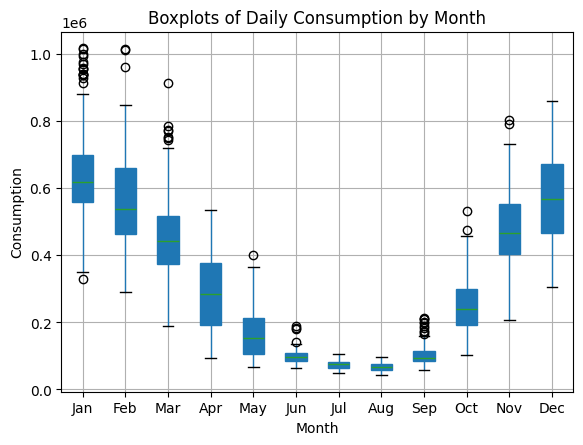

In [953]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract month from 'date' column (1 = January, 12 = December)
conso_data['month'] = conso_data['date'].dt.month

# Define the correct order for months (January to December)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'month' to categorical with the correct order
conso_data['month'] = pd.Categorical(conso_data['month'], categories=range(1, 13), ordered=True)

# Group by 'month' and plot the boxplot
plt.figure(figsize=(10, 6))
conso_data.boxplot(column='pitd', by='month', patch_artist=True)

# Add titles and labels
plt.title('Boxplots of Daily Consumption by Month')
plt.suptitle('')  # To remove the default title added by boxplot
plt.xlabel('Month')
plt.ylabel('Consumption')

# Set the x-ticks to correspond to the month names in the correct order
plt.xticks(ticks=range(1, 13), labels=month_order)

# Show plot
plt.show()

# Regarder le jour de la semaine en fonction de période dans lequel on se trouve. On peut grouper par les saisons ou des périodes calendaires ou par mois, sinon ça mélange un peu tout et on ne voit pas grand chose.
# Boxplot par mois ok, 52 semaines pour croiser variables, scatterplot températures/conso, temp en x et conso en y, nuage de point sur ça. Dans ces nuages de points colorier les jours fériés avec une autre couleur pour montrer qu'ils sont spéciaux.
# Ajouter journées gaziers, jourénes gaz commencent à 6h jour j et va jusquà 3h du mat j+1. 

Text(0.5, 0, 'Is a National Public Holiday')

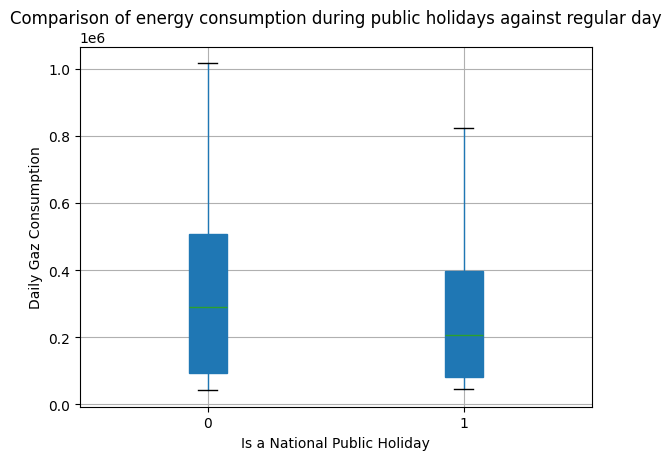

In [954]:
conso_data.boxplot(column='pitd', by='is_public_holiday', patch_artist=True) # only day-off public holidays
plt.title('Comparison of energy consumption during public holidays against regular day')
plt.suptitle('')
plt.ylabel('Daily Gaz Consumption')
plt.xlabel('Is a National Public Holiday')
# Pas super intéressant...
# Si on doit regarder la stat desc, on peut regarder sur google images comment des gens plot leurs trucs. 

Les boxplots témoignent d'une différence notable de consommation de gaz lors d'un jour fêrié et lors d'un jour "normal". La consommation de gaz apparait comme étant plus faible durant ls jours fêriés. C'est un phénomène important que l'on prendra en compte dans notre modélisation.

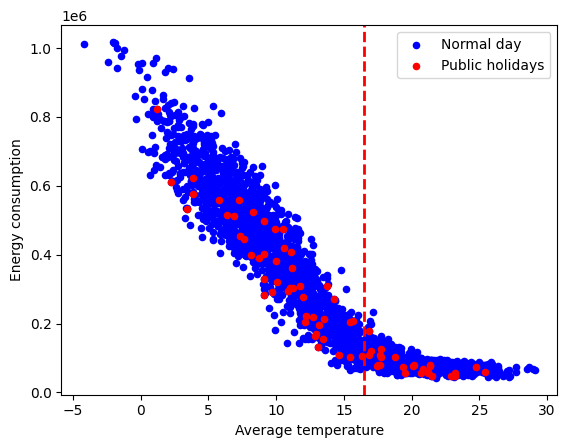

In [955]:
fig, ax = plt.subplots()
# les deux lignes en dessous c'était pour colorer les weekends en rouge et les jours de la semaine en bleu mais c'est moche du coup j'ai mis juste les jours fériés.
#conso_data[conso_data["not_weekend"] == 1].plot.scatter('teff_optim', 'pitd', ax = ax, label = "Weekday")
#conso_data[conso_data["weekend"] == 1].plot.scatter('teff_optim', 'pitd', c = "red", ax = ax, label = "Weekend")
conso_data.plot.scatter('tmoy', 'pitd', c = "blue", ax = ax, label = "Normal day")
conso_data[conso_data['public_holidays'].isin(french_holidays)].plot.scatter('tmoy', 'pitd', c = "red", ax = ax, label = "Public holidays")
plt.xlabel('Average temperature')
plt.ylabel('Energy consumption')
plt.axvline(x=16.5, color='red', linestyle='--', linewidth=2, label='x = 16.5')
# C'est la en fait il faut que je colore les holidays, j'ai pris tmoy ici par contre il y a aussi t_eff etc...
# Tracer une droite à 16.5°C pour marquer la différence de conso passé ce cap. Avant 16.5 il y a cuisine chauffage d'au et en plus le besoin de chauffage.


# Jules : j'ai fait 3 fois le graphique en changeant de type de température. j'ai pas l'impression que ça change grand chose donc on peut garder ce que vous voulez.

On observe clairement la corrélation négative entre la consommation résidentielle de gaz et la température moyenne jusqu'à environ 16.5°C. En effet, en dessous de cette température le chauffage est activé et son intensité dépend négativement de la température. Au dessus de 16.5°C la consommation semble ne plus dépendre de la température, le gaz utilisé pour la cuisson et le chauffage de l'eau est relativement constant. On observe que la consommation de gaz les jours fériés est elle aussi décroissante de la température moyenne et il n'y a pas d'outliers apparents.

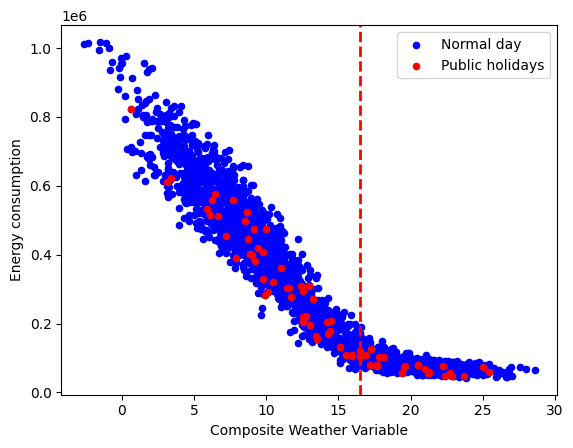

In [956]:
fig, ax = plt.subplots()
#conso_data[conso_data["not_weekend"] == 1].plot.scatter('teff_optim', 'pitd', ax = ax, label = "Weekday")
#conso_data[conso_data["weekend"] == 1].plot.scatter('teff_optim', 'pitd', c = "red", ax = ax, label = "Weekend")
conso_data.plot.scatter('teff_cwv', 'pitd', c = "blue", ax = ax, label = "Normal day")
conso_data[conso_data['public_holidays'].isin(french_holidays)].plot.scatter('teff_cwv', 'pitd', c = "red", ax = ax, label = "Public holidays")
plt.xlabel('Composite Weather Variable')
plt.ylabel('Energy consumption')
plt.axvline(x=16.5, color='red', linestyle='--', linewidth=2, label='x = 16.5')
# C'est la en fait il faut que je colore les holidays, j'ai pris tmoy ici par contre il y a aussi t_eff etc...
# Tracer une droite à 16.5°C pour marquer la différence de conso passé ce cap. Avant 16.5 il y a cuisine chauffage d'au et en plus le besoin de chauffage.

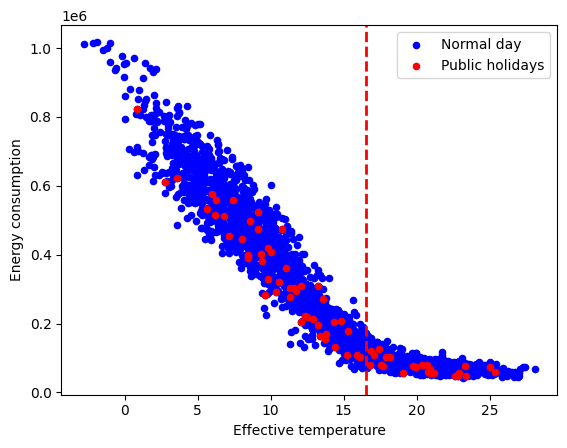

In [958]:
fig, ax = plt.subplots()
#conso_data[conso_data["not_weekend"] == 1].plot.scatter('teff_optim', 'pitd', ax = ax, label = "Weekday")
#conso_data[conso_data["weekend"] == 1].plot.scatter('teff_optim', 'pitd', c = "red", ax = ax, label = "Weekend")
conso_data.plot.scatter('teff_optim', 'pitd', c = "blue", ax = ax, label = "Normal day")
conso_data[conso_data['public_holidays'].isin(french_holidays)].plot.scatter('teff_optim', 'pitd', c = "red", ax = ax, label = "Public holidays")
plt.xlabel('Effective temperature')
plt.ylabel('Energy consumption')
plt.axvline(x=16.5, color='red', linestyle='--', linewidth=2, label='x = 16.5')
# Quasi pareil mais j'ai regardé sur teff cette fois. 
# Ajouter samedi dimanche avec une autre couleur, en gros jours travaillés et jours non travaillés pour avoir un code couleur différent. 
# Donc je colore les holidays différemmetn aussi ? A tester. Pas bcp nombreux donc osef sans doute. sam/dim ou holidays.

C:\Users\juliu\AppData\Local\Temp\ipykernel_29952\2347953475.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = conso_data.pivot_table(values='pitd', index='day_of_week', columns='month', aggfunc='mean')


<Figure size 1200x800 with 0 Axes>

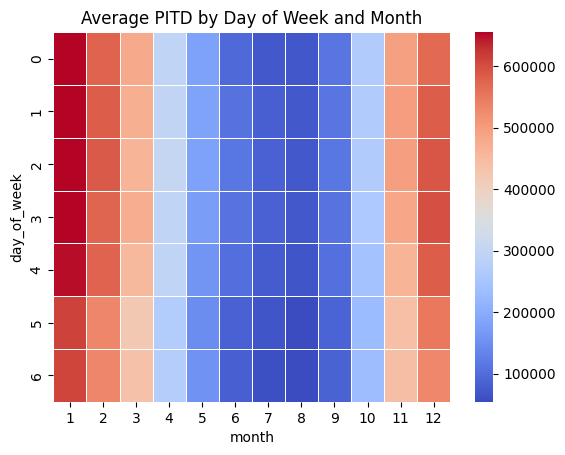

<Figure size 1200x800 with 0 Axes>

In [959]:
pivot_table = conso_data.pivot_table(values='pitd', index='day_of_week', columns='month', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Average PITD by Day of Week and Month')
plt.figure(figsize=(12, 8))  
# Une heatmap pour la conso moyenne sur les jours et les mois. Oups, bon je vais régler ça après.

On retrouve les principales observations faites : 
- la différence de consommation de gaz entre le printemps/été et l'automne/hiver est marquée
- la consommation de gaz le weekend est légérement inférieure à celle de la semaine

In [960]:
print(conso_data['pitd'].describe())

count    2.297000e+03
mean     3.225228e+05
std      2.292691e+05
min      4.212710e+04
25%      9.415002e+04
50%      2.875569e+05
75%      5.052268e+05
max      1.017746e+06
Name: pitd, dtype: float64


In [961]:
binary_columns = [col for col in conso_data.columns if conso_data[col].dropna().nunique() == 2]
print(binary_columns)

['below16.5', 'below16.5_abc', 'etats', 'type_vol', 'isWeekday', 'isWeekend', 'isBizday', 'isHoliday', 'weekend', 'not_weekend', 'noel.structural', 'aout.structural', 'ponts_publics', 'ponts_extended', 'holidays', 'is_public_holiday']


In [962]:
matrix_var = ['pitd', 'li', 'target', 'below16.5', 'isWeekday', 'isBizday', 'noel.structural', 'public_holidays', 'ponts_publics']

In [963]:
conso_data['public_holidays'] = conso_data['public_holidays'].apply(lambda x: 0 if x == 'NotAHoliday' else 1)
corr_matrix = conso_data[matrix_var].corr()
# La j'ai regardé un peu les corrélations pour voir ce qu'il se passait.

In [964]:
corr_matrix

,pitd,li,target,below16.5,isWeekday,isBizday,noel.structural,public_holidays,ponts_publics
pitd,1.000000,0.312851,0.081696,0.709482,0.063523,0.063523,0.169918,-0.037872,-0.038942
li,0.312851,1.000000,0.060113,0.352103,0.072157,0.072157,0.150407,-0.016901,0.001093
target,0.081696,0.060113,1.000000,0.035897,0.195424,0.195424,0.034775,0.008353,0.010732
below16.5,0.709482,0.352103,0.035897,1.000000,0.009440,0.009440,0.116688,0.000526,-0.043132
isWeekday,0.063523,0.072157,0.195424,0.009440,1.000000,1.000000,-0.006810,0.028055,0.060668
isBizday,0.063523,0.072157,0.195424,0.009440,1.000000,1.000000,-0.006810,0.028055,0.060668
noel.structural,0.169918,0.150407,0.034775,0.116688,-0.006810,-0.006810,1.000000,0.213176,0.093001
public_holidays,-0.037872,-0.016901,0.008353,0.000526,0.028055,0.028055,0.213176,1.000000,0.005150
ponts_publics,-0.038942,0.001093,0.010732,-0.043132,0.060668,0.060668,0.093001,0.005150,1.000000


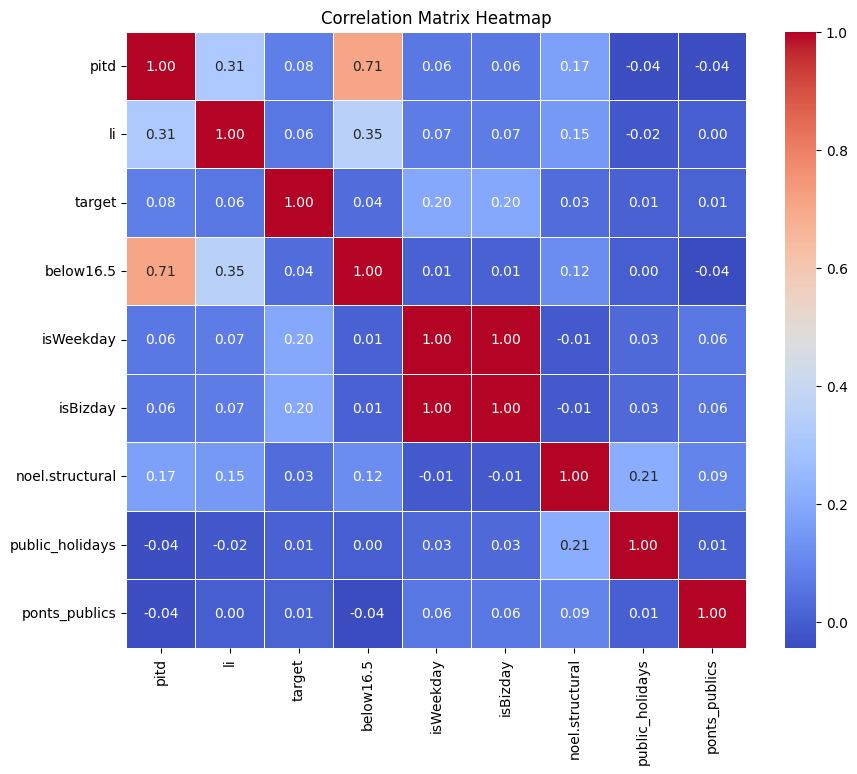

In [965]:
plt.figure(figsize=(10, 8))  # Optional: adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()
# Prendre uniquement les variables numériques et enlever les variables binaires parce que colinéarité sinon entre binaires.

In [966]:
# C'est tout. 
# Pour résumer, variables sont explicatives on a vu les noms, il faut ajuster les graphiques avec les consignes au dessus, code couleurs, commentaires etc...
# Tout ça pour le chapitre stat desc de data, faire le petit ex de chaines de markov sur les deux états. Essayer de faire un ex avec 4 états. 
# Est ce que vous pourrez envoyer le notebook ? Des chaines de markov que vous avez fait. 
# Parler des chaines de markov et dire que c'est une variable explicative, on n'impose rien par convention.
# Dire qu'on a pas besoin de croiser les variables car catboost le fait. Oui catboost le fait mais ça dépend de la depth des sous arbres qu'il fait, j'avais essayer de faire de la cross validation pour voir le mieux.
# has_time pour les time series, si on lui dit pas qu'il y a time il dire au hasard les points, à tester. 